### Mount Google Drive containing checkpoints

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install the package

In [ ]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-hwi2qh7v
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-hwi2qh7v
     |████████████████████████████████| 3.3MB 17.6MB/s 
     |████████████████████████████████| 952kB 49.6MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp37-none-any.whl size=34530 sha256=dcf33ae41c06bc97be10e80b7faf280944c6004e9c7521221ec70ee3037f03cc
  Stored in directory: /tmp/pip-ephem-wheel-cache-blo4inb6/wheels/a8/be/2c/1e1f0a75330e3ae33dd34c2ba085929eb7c7ae1d2184f4b7b5
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully unin

### Download the dataset

In [ ]:
!wget "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/redacted?download=1" -O /content/dataset.zip
!unzip "/content/dataset.zip" -d "/content/"
!mv /content/dataset-mapillary-vistas-v2/ /content/dataset

Streaming output truncated to the last 5000 lines.
 extracting: /content/dataset-mapillary-vistas-v2/training/images/7CgTC5v7XzdyZnAI4dju5Q.png  
 extracting: /content/dataset-mapillary-vistas-v2/training/images/7cRXJ_9ndgHqDN72n1TmJw.png  
  inflating: /content/dataset-mapillary-vistas-v2/training/images/7Df7gOFFANvrqcDQbHI0VA.png  
  inflating: /content/dataset-mapillary-vistas-v2/training/images/7EiBpD0BkSL6TAPlJDcVPg.png  
  inflating: /content/dataset-mapillary-vistas-v2/training/images/7ENXa9HYInblv5eNCeFTmw.png  
 extracting: /content/dataset-mapillary-vistas-v2/training/images/7FNvh4Ya_3aIYDCSVMUKNQ.png  
 extracting: /content/dataset-mapillary-vistas-v2/training/images/7FoA_I4DtLKxuVA4ZcEZ2g.png  
 extracting: /content/dataset-mapillary-vistas-v2/training/images/7Gk3b1Al1pBN_qNmTkHUXw.png  
 extracting: /content/dataset-mapillary-vistas-v2/training/images/7gsWdahIWSYgrwe_ElqMHA.png  
  inflating: /content/dataset-mapillary-vistas-v2/training/images/7HbkLxmEnWsbxqrNRZ_Elw.png  

### Pick validation image

In [ ]:
import os
import os.path
import random

In [ ]:
IMAGE_DIR = "/content/dataset/validation/images/"
files = next(os.walk(IMAGE_DIR))[2]
file = os.path.join(IMAGE_DIR, random.choice(files))
print(file)

/content/dataset/validation/images/v2GiM4aN8nF3yVWIPn0TwA.png


### Predict billboard locations

In [ ]:
model_path = "/content/drive/MyDrive/Masters/models/segnet/model" #@param {type:"string"}

In [ ]:
from keras_segmentation.predict import predict

class_colors = [
  (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
  for _ in range(5000)
]
class_colors[0] = (0,0,125)
class_colors[1] = (255,255,0)

out = predict(
    checkpoints_path=model_path,
    inp=file,
    out_fname="/content/out.png",
    overlay_img=True,
    show_legends=True,
    class_names = [ "Background", "Billboard"],
    colors=class_colors
)

loaded weights  /content/drive/MyDrive/Masters/models/segnet/model.00005


### Display prediction output

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

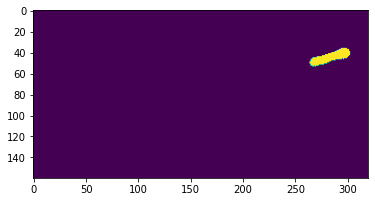

In [ ]:
plt.imshow(out)

In [ ]:
from IPython.display import Image

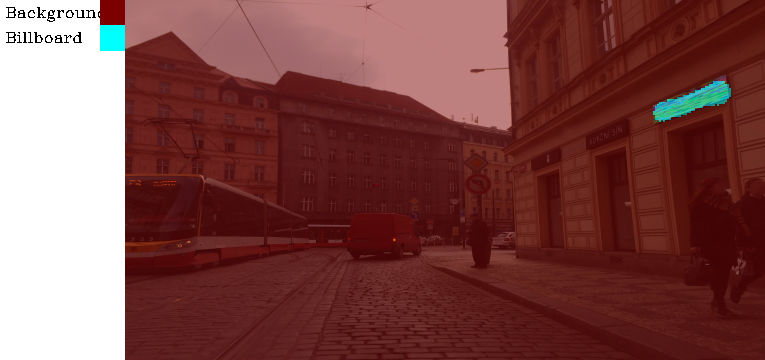

In [ ]:
Image("/content/out.png")

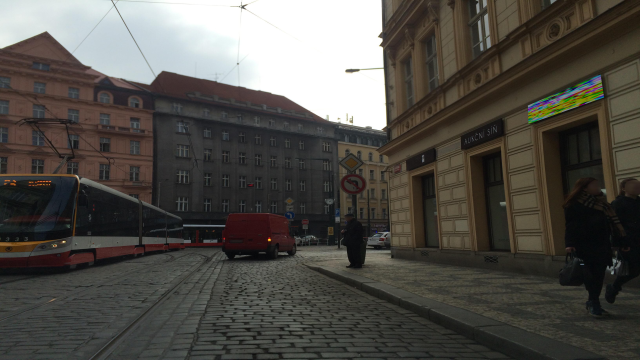

In [ ]:
Image(file)